## MODEL FOR URL DATA (WEB etc) and OPEN SOURCE DATA

In [9]:
from newspaper import Article
import pandas as pd
import re

In [17]:
from nltk.corpus import stopwords

Error fetching article from https://papua.tribunnews.com/2023/11/22/layanan-telkom-buruk-di-papua-selatan-internet-lamban-begini-jawaban-manajemen-witel-papua: Article `download()` failed with 403 Client Error: Forbidden for url: https://papua.tribunnews.com/2023/11/22/layanan-telkom-buruk-di-papua-selatan-internet-lamban-begini-jawaban-manajemen-witel-papua on URL https://papua.tribunnews.com/2023/11/22/layanan-telkom-buruk-di-papua-selatan-internet-lamban-begini-jawaban-manajemen-witel-papua


[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Distribusi Sentimen:
Sentiment_Category
Positive    3
Neutral     2
Negative    1
Name: count, dtype: int64

Contoh Berita dengan Kategorisasi Sentimen:
                                             Content Sentiment_Category
0  Jakarta, CNBC Indonesia - Emiten telekomunikas...           Positive
1  --\n\nPT Telkom Indonesia Tbk (TLKM) blak-blak...           Positive
2                                                               Neutral
3  Next Article Bos Bukalapak jadi Direksi Telkom...            Neutral
4  Direktur Utama Telkom Indonesia Ririek Adrians...           Positive
5  Liputan6.com, Jakarta - Saham PT Telkom Indone...           Negative


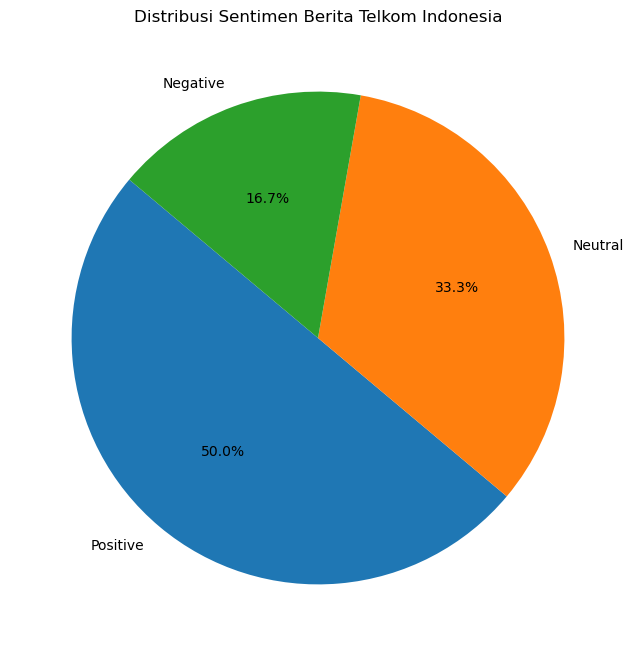

In [90]:
from newspaper import Article
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# URl terkait dengan PT Telkom
urls = [
    "https://www.cnbcindonesia.com/research/20240731131129-128-559189/ini-penyumbang-pendapatan-telkom-mana-paling-besar",  # Gantilah dengan URL artikel berita asli
    "https://www.cnnindonesia.com/ekonomi/20240503175131-92-1093705/telkom-blak-blakan-soal-nilai-saham-yang-melemah",
    "https://papua.tribunnews.com/2023/11/22/layanan-telkom-buruk-di-papua-selatan-internet-lamban-begini-jawaban-manajemen-witel-papua",
    "https://www.cnbcindonesia.com/market/20180809141848-17-27781/aksi-jual-investor-asing-di-saham-telkom-berlanjut-ada-apa",
    "https://market.bisnis.com/read/20240610/192/1772900/saham-telkom-tlkm-terus-anjlok-seperti-saat-pandemi-bakal-buyback",
    "https://www.liputan6.com/saham/read/5603501/saham-tlkm-babak-belur-sepanjang-2024-bagaimana-prospeknya?page=2",
]

def fetch_article(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        return article.text
    except Exception as e:
        print(f"Error fetching article from {url}: {e}")
        return ""

# Mengambil berita
news_contents = [fetch_article(url) for url in urls]

# Membuat DataFrame untuk menyimpan berita
df_news = pd.DataFrame(news_contents, columns=['Content'])

# Mengunduh stop words dan VADER lexicon
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Menghapus URL
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Menghapus karakter non-alphabetic
    text = text.lower()  # Mengubah teks menjadi huruf kecil
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Menghapus stop words
    return text

# Membersihkan konten berita
df_news['Cleaned_Content'] = df_news['Content'].apply(clean_text)

# Inisialisasi VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Fungsi untuk menganalisis sentimen
def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Menerapkan analisis sentimen ke berita
df_news['Sentiment'] = df_news['Cleaned_Content'].apply(analyze_sentiment)

# Mengelompokkan sentimen
def sentiment_category(sentiment_score):
    if sentiment_score > 0.05:
        return 'Positive'
    elif sentiment_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df_news['Sentiment_Category'] = df_news['Sentiment'].apply(sentiment_category)

# Menampilkan distribusi sentimen
print("Distribusi Sentimen:")
print(df_news['Sentiment_Category'].value_counts())

# Menampilkan beberapa contoh berita dengan kategorisasi sentimen
print("Berita dengan Kategorisasi Sentimen yang telah di modelkan:")
print(df_news[['Content', 'Sentiment_Category']].head(10))

# Membuat pie chart dari kategori sentimen
plt.figure(figsize=(8, 8))
df_news['Sentiment_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Sentimen Berita Telkom Indonesia')
plt.ylabel('')
plt.show()

In [92]:
df_news.head(10)

,Content,Cleaned_Content,Sentiment,Sentiment_Category
0,"Jakarta, CNBC Indonesia - Emiten telekomunikas...",jakarta cnbc indonesia emiten telekomunikasi p...,0.1531,Positive
1,--\n\nPT Telkom Indonesia Tbk (TLKM) blak-blak...,pt telkom indonesia tbk tlkm blakblakan soal t...,0.6808,Positive
2,,,0.0000,Neutral
3,Next Article Bos Bukalapak jadi Direksi Telkom...,next article bos bukalapak jadi direksi telkom...,0.0000,Neutral
4,Direktur Utama Telkom Indonesia Ririek Adrians...,direktur utama telkom indonesia ririek adrians...,0.3400,Positive
5,"Liputan6.com, Jakarta - Saham PT Telkom Indone...",liputancom jakarta saham pt telkom indonesia t...,-0.5464,Negative


## MODEL FOR LOCAL DATA

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/43/fqh9vxfs3tbfzc60n7zwz2v00000gn/T/ipykernel_2629/1998623258.py:64: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_news = pd.concat([df_news, new_row], ignore_index=True)


Distribusi Sentimen:
Sentiment_Category
Positive    3
Name: count, dtype: int64

Contoh Teks dengan Kategorisasi Sentimen:
                                             Content Sentiment_Category
0  Asia Pacific Equity Research\n30 July 2024\nJ ...           Positive
1  EQUITY RESEARCH - MNCS COMPANY UPDATES\nTeleco...           Positive
2    Equity Research  \n2 August 2024  \n \n 1 Co...           Positive


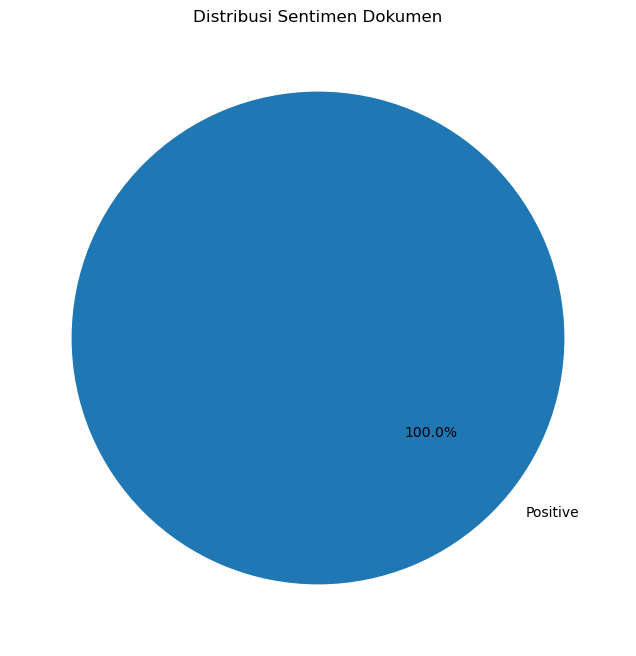

In [52]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import PyPDF2

# Mengunduh stop words dan VADER lexicon
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Fungsi untuk membaca file teks (.txt)
def read_txt_file(file_path):
    with open(file_path, 'r') as file:
        return file.read()

# Fungsi untuk membaca file .pdf
def read_pdf_file(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
        return text

# Daftar file yang ingin Anda analisis
file_paths = [
    '/Users/Apple/Documents/Analyst Report/TLKM-240731-JPMORGAN-First Take2Q24_ Underlying earnings ahead of JPMe, though top-line trends subdued.pdf',
    '/Users/Apple/Documents/Analyst Report/TLKM-240802-MNC-Mid-Year Review_ Challenges Persist, Target Updated.pdf',
    '/Users/Apple/Documents/Analyst Report/TLKM-240802-OCBC-Lackluster Results from Cellular Data & Indihome Segments.pdf',
    # Tambahkan path file lainnya di sini
]

# Membuat DataFrame kosong untuk menyimpan hasil dari semua file
df_news = pd.DataFrame(columns=['Content', 'Cleaned_Content', 'Sentiment', 'Sentiment_Category'])

# Loop untuk memproses setiap file
for file_path in file_paths:
    # Baca dokumen tergantung dari tipe file
    if file_path.endswith('.txt'):
        document_text = read_txt_file(file_path)
    elif file_path.endswith('.pdf'):
        document_text = read_pdf_file(file_path)
    else:
        print(f"Unsupported file format: {file_path}")
        continue  # Lewatkan file jika formatnya tidak didukung

    # Membersihkan konten dokumen
    cleaned_content = clean_text(document_text)
    
    # Menganalisis sentimen
    sentiment_score = analyze_sentiment(cleaned_content)
    sentiment_category_value = sentiment_category(sentiment_score)
    
    # Menyimpan hasil ke DataFrame
    new_row = pd.DataFrame({
        'Content': [document_text],
        'Cleaned_Content': [cleaned_content],
        'Sentiment': [sentiment_score],
        'Sentiment_Category': [sentiment_category_value]
    })
    
    df_news = pd.concat([df_news, new_row], ignore_index=True)

# Menampilkan distribusi sentimen
print("Distribusi Sentimen:")
print(df_news['Sentiment_Category'].value_counts())

# Menampilkan beberapa contoh teks dengan kategorisasi sentimen
print("\nContoh Teks dengan Kategorisasi Sentimen:")
print(df_news[['Content', 'Sentiment_Category']].head(10))

# Membuat pie chart dari kategori sentimen
plt.figure(figsize=(8, 8))
df_news['Sentiment_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Sentimen Dokumen')
plt.ylabel('')
plt.show()

In [54]:
df_news.head()

,Content,Cleaned_Content,Sentiment,Sentiment_Category
0,Asia Pacific Equity Research\n30 July 2024\nJ ...,asia pacific equity research july j p r g n ww...,0.9999,Positive
1,EQUITY RESEARCH - MNCS COMPANY UPDATES\nTeleco...,equity research mncs company updates telecommu...,0.9976,Positive
2,Equity Research \n2 August 2024 \n \n 1 Co...,equity research august company update telkom i...,0.9985,Positive
